In [1]:
import os
import torch
    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

# !pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

# Helper function for visualization.
# %matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt


def visualize_graph(G, color):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                     node_color=color, cmap="Set2")
    plt.show()


def visualize_embedding(h, color, epoch=None, loss=None):
    plt.figure(figsize=(2,2))
    plt.xticks([])
    plt.yticks([])
    h = h.detach().cpu().numpy()
    plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
    if epoch is not None and loss is not None:
        plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    plt.show()

In [2]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4


In [57]:
data = dataset[0]  # Get the first graph object.

# print(data)
# print('==============================================================')

# # Gather some statistics about the graph.
# print(f'Number of nodes: {data.num_nodes}')
# print(f'Number of edges: {data.num_edges}')
# print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
# print(f'Number of training nodes: {data.train_mask.sum()}')
# print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
# print(f'Has isolated nodes: {data.has_isolated_nodes()}')
# print(f'Has self-loops: {data.has_self_loops()}')
# print(f'Is undirected: {data.is_undirected()}')

In [49]:
from torch_geometric.transforms import AddLaplacianEigenvectorPE
LE = AddLaplacianEigenvectorPE(3, attr_name = None , is_undirected = True) 
# set attr_name to None so le will be concatenated to x(node features). 

In [50]:
LE(data) # this line will change the data. 
#if want to try different length for vectors in LE(in the above line i set it to 3), 
# you should run block containing [data = dataset[0]] first.

Data(x=[34, 37], edge_index=[2, 156], y=[34], train_mask=[34])

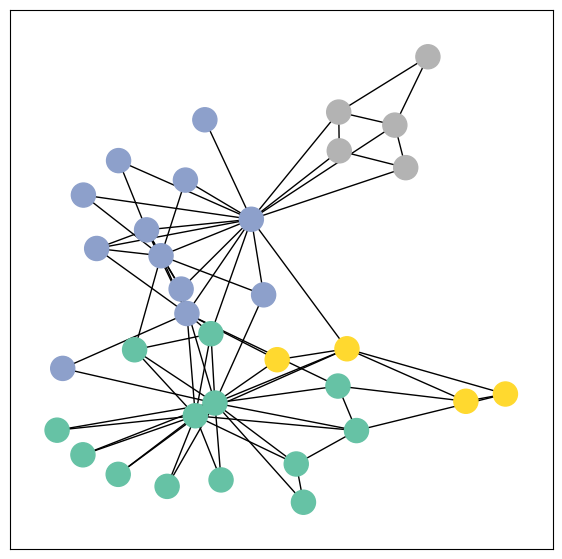

In [51]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize_graph(G, color=data.y)

In [75]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)
        self.conv1 = GCNConv(-1 , 20)
        self.conv2 = GCNConv(20, 20)
        self.conv3 = GCNConv(20, 15)
        self.conv4 = GCNConv(15, 12)
        self.conv5 = GCNConv(12, 10)
        self.conv6 = GCNConv(10, 8)
        self.conv7 = GCNConv(8, 7)
        self.conv8 = GCNConv(7, 6)
        self.conv9 = GCNConv(6, 5)
        self.conv10 = GCNConv(5, 4)
        self.conv11 = GCNConv(4, 3)
        self.conv12 = GCNConv(3, 2)
        self.conv13 = GCNConv(2, 2)
        self.conv14 = GCNConv(2, 2)
        self.conv15 = GCNConv(2, 2)
        self.conv16 = GCNConv(2, 2)
        self.conv17 = GCNConv(2, 2)
        
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh() 
        h = self.conv4(h, edge_index)
        h = h.tanh()
        h = self.conv5(h, edge_index)
        h = h.tanh()
        h = self.conv6(h, edge_index)
        h = h.tanh()
        h = self.conv7(h, edge_index)
        h = h.tanh()
        h = self.conv8(h, edge_index)
        h = h.tanh()
        h = self.conv9(h, edge_index)
        h = h.tanh()
        h = self.conv10(h, edge_index)
        h = h.tanh()
        h = self.conv11(h, edge_index)
        h = h.tanh()
        h = self.conv12(h, edge_index)
        h = h.tanh()
        h = self.conv13(h, edge_index)
        h = h.tanh()
        h = self.conv14(h, edge_index)
        h = h.tanh()
        h = self.conv15(h, edge_index)
        h = h.tanh()
        h = self.conv16(h, edge_index)
        h = h.tanh()
        h = self.conv17(h, edge_index)
        h = h.tanh()
        
        # Final GNN embedding space.
        
        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(34, 30)
  (conv2): GCNConv(30, 20)
  (conv3): GCNConv(20, 15)
  (conv4): GCNConv(15, 12)
  (conv5): GCNConv(12, 10)
  (conv6): GCNConv(10, 8)
  (conv7): GCNConv(8, 7)
  (conv8): GCNConv(7, 6)
  (conv9): GCNConv(6, 5)
  (conv10): GCNConv(5, 4)
  (conv11): GCNConv(4, 3)
  (conv12): GCNConv(3, 2)
  (conv13): GCNConv(2, 2)
  (conv14): GCNConv(2, 2)
  (conv15): GCNConv(2, 2)
  (conv16): GCNConv(2, 2)
  (conv17): GCNConv(2, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


Embedding shape: [34, 2]


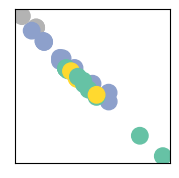

In [76]:
model = GCN()

_, h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')

visualize_embedding(h, color=data.y)

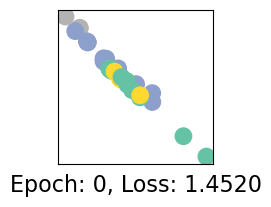

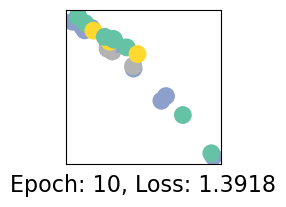

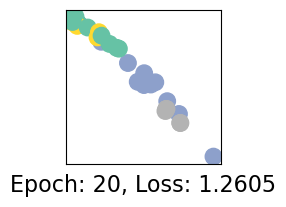

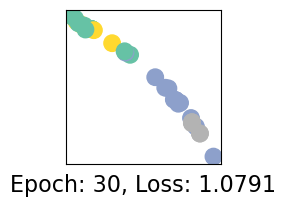

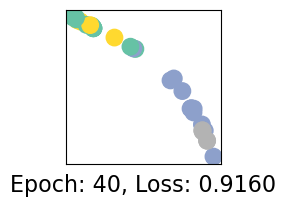

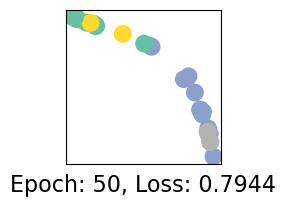

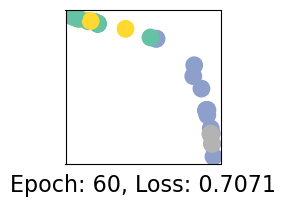

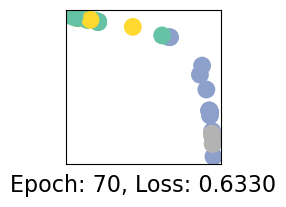

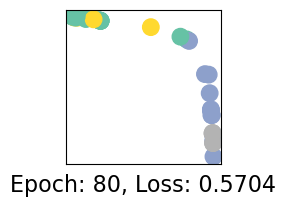

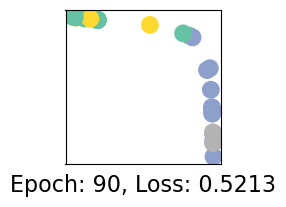

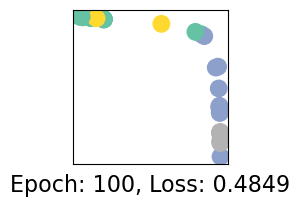

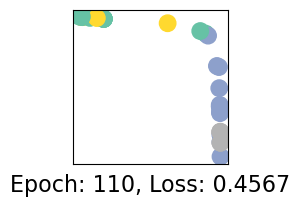

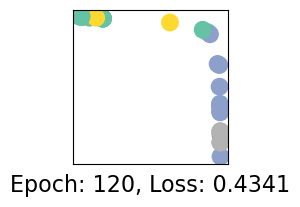

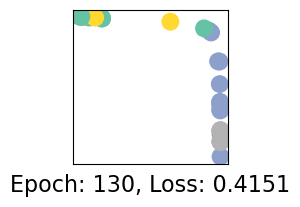

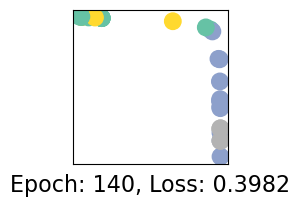

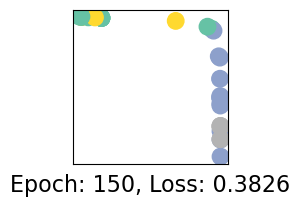

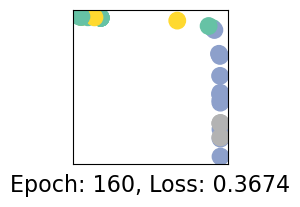

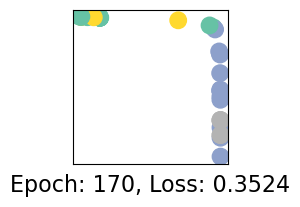

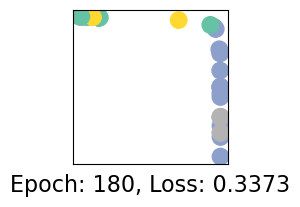

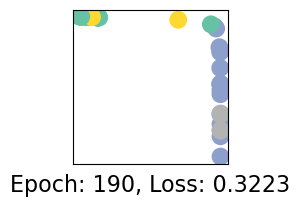

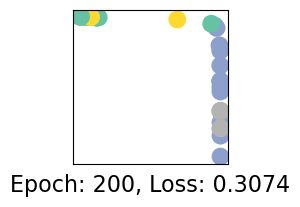

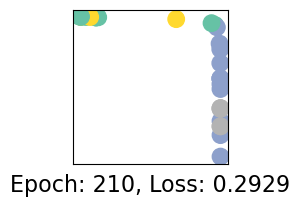

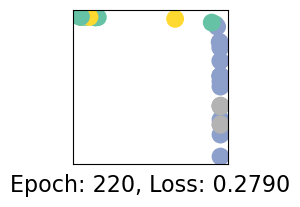

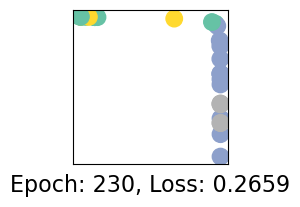

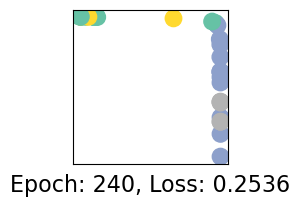

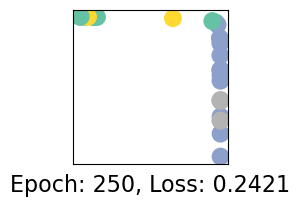

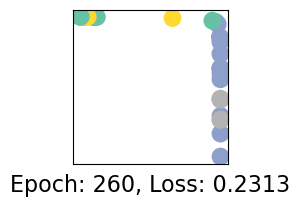

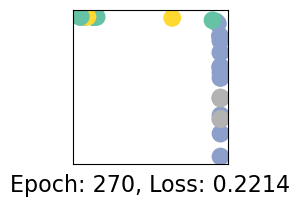

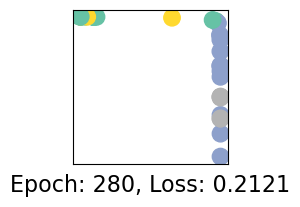

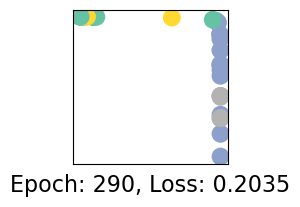

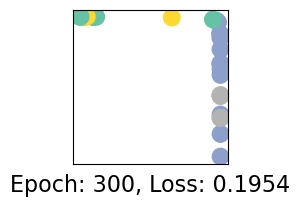

In [77]:
import time

model = GCN()
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h

for epoch in range(301):
    loss, h = train(data)
    if epoch % 10 == 0:
        visualize_embedding(h, color=A.y, epoch=epoch, loss=loss)
        time.sleep(0.3)